In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# crimes_df = pd.read_csv("Crimes.csv")
moon_df = pd.read_csv("full_moon.csv")
holidays_df = pd.read_csv("holidays.csv")
weather_df = pd.read_csv("weather.csv")
vc_df = pd.read_csv("violent_crimes.csv")

In [5]:
# crimes_df.head()

#convert Date to datetime
vc_df["Date"] = pd.to_datetime(vc_df["Date"])
#make Date into two columns with the date and time
vc_df["Time"] = vc_df["Date"].dt.time
vc_df["Date"] = vc_df["Date"].dt.date
# crimes_df.head()

In [6]:
# moon_df.head()
#rename FullMoonDates to Date
moon_df.rename(columns = {'FullMoonDates':'Date'}, inplace = True)
#convert Date to datetime
moon_df["Date"] = pd.to_datetime(moon_df["Date"])
moon_df.head()

,Year,Date
0,2005,2005-01-25
1,2005,2005-02-24
2,2005,2005-03-25
3,2005,2005-04-24
4,2005,2005-05-23


In [7]:
# holidays_df.head()
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
holidays_df.head()

,Holiday,Date,Day of Week
0,New Year's Day,2010-01-01,Friday
1,Martin Luther King Jr. Day,2010-01-18,Monday
2,Presidents' Day,2010-02-15,Monday
3,Memorial Day,2010-05-31,Monday
4,Independence Day,2010-07-04,Sunday


In [8]:
# weather_df.head()
#rename datetime to Date
weather_df.rename(columns = {'datetime':'Date'}, inplace = True)
#convert Date to datetime
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
weather_df.head()

,name,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Chicago,United States",2010-01-01,-8.3,-14.5,-11.7,-15.0,-22.4,-19.0,-16.1,69.8,...,6.6,3,NaN,2010-01-01T07:18:22,2010-01-01T16:30:09,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1,"Chicago,United States",2010-01-02,-11.4,-16.4,-14.1,-18.4,-25.3,-22.6,-19.6,63.1,...,8.5,4,NaN,2010-01-02T07:18:26,2010-01-02T16:31:02,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
2,"Chicago,United States",2010-01-03,-7.9,-17.5,-12.5,-14.7,-25.6,-20.5,-17.6,66.0,...,7.6,4,NaN,2010-01-03T07:18:28,2010-01-03T16:31:56,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,..."
3,"Chicago,United States",2010-01-04,-7.4,-13.1,-10.2,-14.4,-21.3,-17.6,-14.6,69.8,...,3.5,2,NaN,2010-01-04T07:18:27,2010-01-04T16:32:51,0.64,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."
4,"Chicago,United States",2010-01-05,-5.1,-9.5,-7.9,-11.7,-15.9,-14.2,-12.3,70.8,...,5.8,3,NaN,2010-01-05T07:18:25,2010-01-05T16:33:49,0.67,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,74466504838,..."


In [32]:
# type(crimes_df["Date"][0])
# type(moon_df["Date"][0])
# type(holidays_df["Date"][0])
# type(weather_df["Date"][0])
vc_df['Date'] = pd.to_datetime(vc_df['Date'])
type(vc_df["Date"][0])
len(vc_df)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time


In [15]:
# keep only rows that match the date in vc_df
merged_df =pd.merge(vc_df, moon_df, on='Date', how='left')

merged_df =pd.merge(merged_df, holidays_df, on='Date', how='left')
merged_df =pd.merge(merged_df, weather_df, on='Date', how='left')
# # keep only rows that match the date in moon_df
# merged_df = pd.merge(moon_df, vc_df, on='Date', how='outer')
# with all columns
len(merged_df)
merged_df.head()
# merged_df.columns

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,26262,JE366265,2021-09-08,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,...,7.0,6.0,NaN,2021-09-08T06:23:43,2021-09-08T19:11:43,0.06,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"72534014819,C8740,KORD,KMDW,72530094846,F1983,..."
1,13202316,JG414343,2023-09-06,011XX S ST LOUIS AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",ALLEY,False,True,...,2.7,3.0,30.0,2023-09-06T06:21:11,2023-09-06T19:15:59,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2,13203412,JG415087,2023-09-06,033XX W ARTHINGTON ST,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,True,...,2.7,3.0,30.0,2023-09-06T06:21:11,2023-09-06T19:15:59,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,13201689,JG413578,2023-09-06,042XX W THOMAS ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,...,2.7,3.0,30.0,2023-09-06T06:21:11,2023-09-06T19:15:59,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,13202354,JG414329,2023-09-06,031XX W LEXINGTON ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,APARTMENT,False,True,...,2.7,3.0,30.0,2023-09-06T06:21:11,2023-09-06T19:15:59,0.75,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


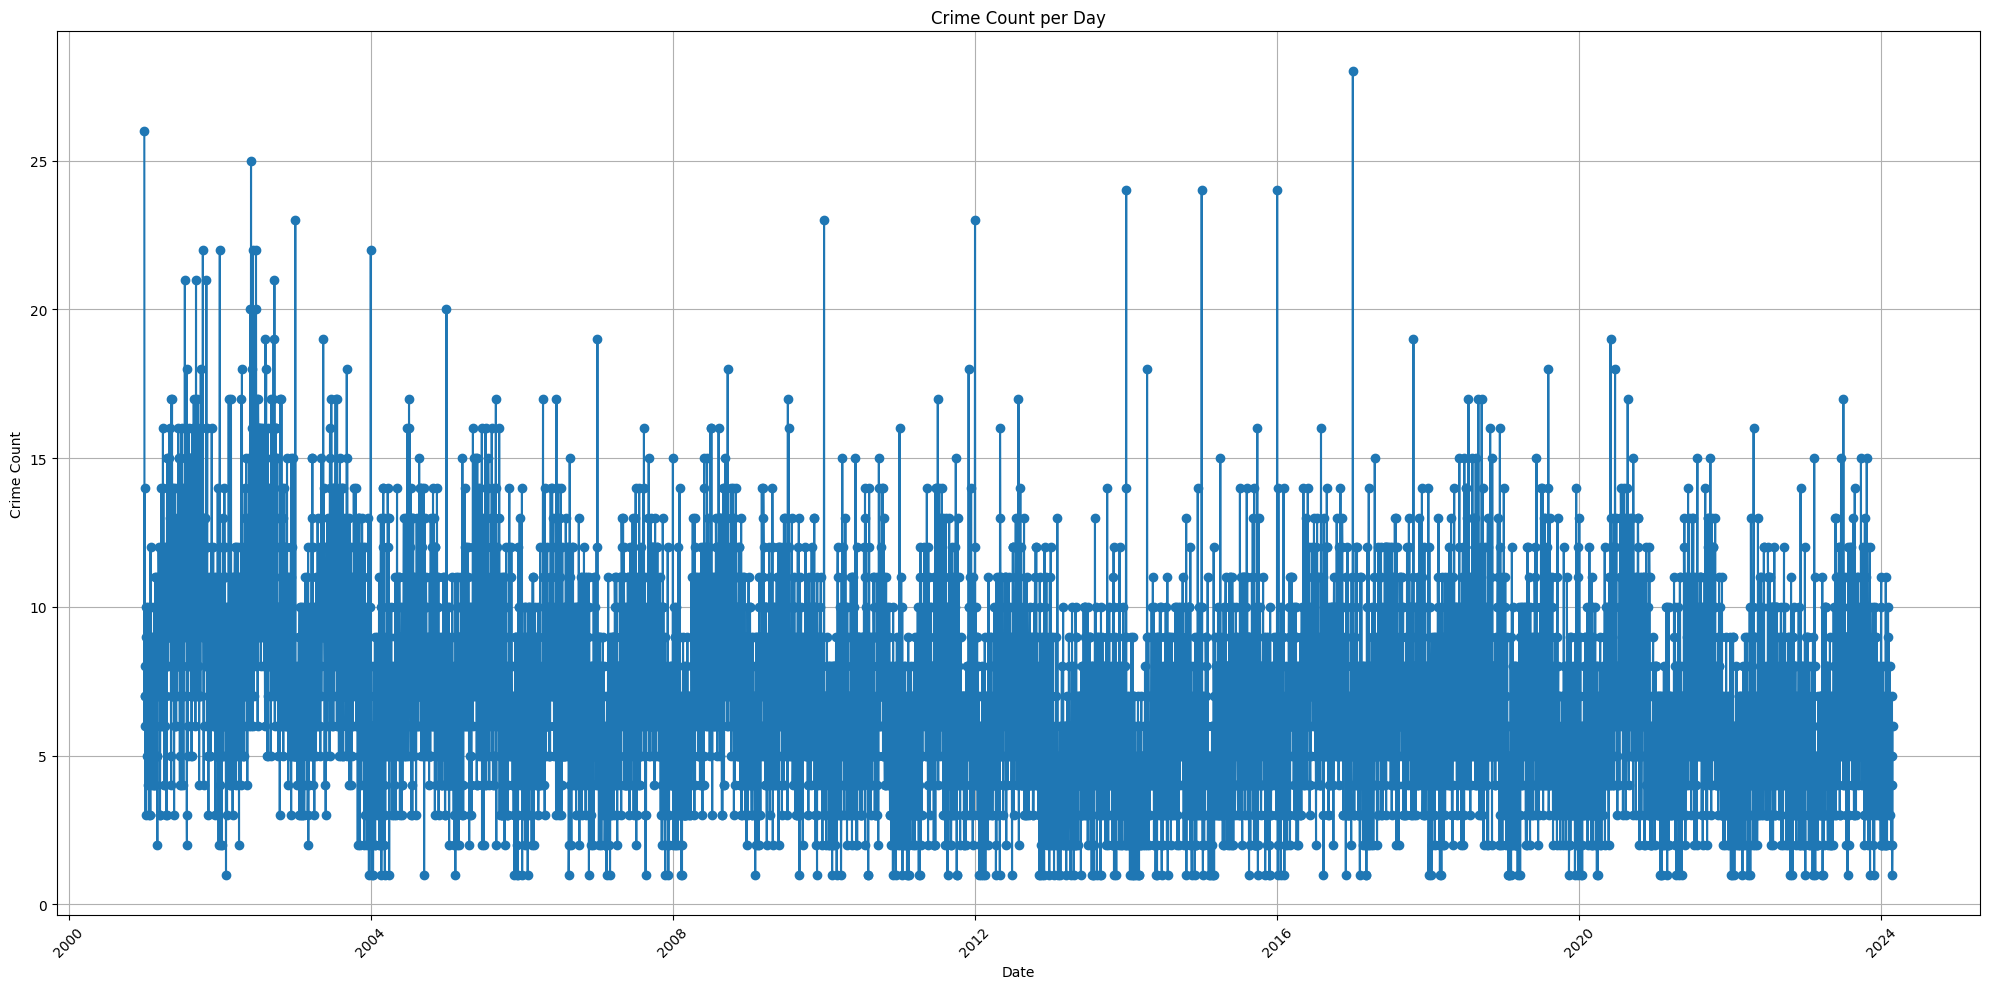

In [23]:
#get count of crimes per day if there is a case number
# if there is a case number, add the crime count to the date
# if there is no case number, add 0 to the date
# add a column for crime count
crime_count_per_day = merged_df.groupby('Date')['Case Number'].count()
# crime_count_per_day
# Plotting
plt.figure(figsize=(20, 10))
plt.plot(crime_count_per_day.index, crime_count_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Crime Count per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
crime_count_per_day

Date
2001-01-01    26
2001-01-02     6
2001-01-03    14
2001-01-04     7
2001-01-05     7
              ..
2024-02-20     5
2024-02-21     7
2024-02-22     1
2024-02-23     2
2024-02-24     6
Name: Case Number, Length: 8422, dtype: int64

In [56]:
crime_count_per_day
merged_data = pd.merge(crime_count_per_day, moon_df, on='Date', how='left')

# Drop rows with missing values in 'Case Number' column
merged_data.dropna(subset=['Case Number'], inplace=True)

# Ensure 'Case Number' column is numeric
merged_data['Case Number'] = pd.to_numeric(merged_data['Case Number'])

# Ensure 'Date' column is numeric
merged_data['Date'] = pd.to_numeric(merged_data['Date'])

# Calculate correlation between crime count per day and full moon dates
correlation = merged_data['Case Number'].corr(merged_data['Date'])

print("Correlation between full moon dates and crime counts per day:", correlation)

Correlation between full moon dates and crime counts per day: -0.2565882800856695


In [57]:
merged_data = pd.merge(crime_count_per_day, holidays_df, on='Date', how='left')

# Drop rows with missing values in 'Case Number' column
merged_data.dropna(subset=['Case Number'], inplace=True)

# Ensure 'Case Number' column is numeric
merged_data['Case Number'] = pd.to_numeric(merged_data['Case Number'])

# Ensure 'Date' column is numeric
merged_data['Date'] = pd.to_numeric(merged_data['Date'])

# Calculate correlation between crime count per day and holiday dates
correlation = merged_data['Case Number'].corr(merged_data['Date'])

print("Correlation between holiday dates and crime counts per day:", correlation)

Correlation between holiday dates and crime counts per day: -0.2565882800856695


In [58]:
new_moon_dates = merged_df[merged_df['moonphase'] == 0]['Date']
new_moon_year = new_moon_dates.dt.year
# new_moon_year
nmset = set(new_moon_dates)
nmcrimes= merged_df[merged_df['Date'].isin(nmset)]
nmcrimes
new_moon_crime_counts = crime_count_per_day[crime_count_per_day.index.isin(nmset)]
new_moon_crime_counts
total_crimes_on_new_moons = new_moon_crime_counts.sum()
total_crimes_on_new_moons
total_crimes = crime_count_per_day.sum()
total_crimes
proportion_new_moon_crimes = total_crimes_on_new_moons / total_crimes
proportion_new_moon_crimes
# crime_count_per_day
#compare new moon dates to crime count to get the correlation of crime_count_per_day and new moon dates
# new_moon_dates.corr(crime_count_per_day)

0.019058065400699254

In [60]:
merged_df['Year'] = merged_df['Date'].dt.year
crime_count_per_year = merged_df.groupby(['Year', 'Date'])['Case Number'].count()
for year, data in crime_count_per_year.groupby(level=0):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index.get_level_values('Date'), data.values, marker='o', linestyle='-')
    full_moon_dates = moon_df[moon_df['Date'].dt.year == year]['Date']
    new_moon_dates = weather_df[weather_df['moonphase'] == 0]['Date']
    for date in moon_df[moon_df['Date'].dt.year == year]['Date']:
        plt.axvline(x=date, color='orange', linestyle='--', linewidth=1, label='Full Moon')
    holiday_dates = holidays_df[holidays_df['Date'].dt.year == year]['Date']
    for date in holiday_dates:
        plt.axvline(x=date, color='red', linestyle=':', linewidth=1, label='Holiday')
    plt.xlabel('Date')
    plt.ylabel('Crime Count')
    plt.title(f'Crime Count per Day - Year {year}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()